In [280]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import normaltest
from statsmodels.graphics.gofplots import qqplot

In [281]:
df = pd.read_excel("C:\\Users\\Danila\\Desktop\\Таблица по всем данным.xls")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               0 non-null      float64
 1   Шифр (порядковый номер образца-месяц)    2119 non-null   object 
 2   Рецептура (цинк/стеарин/бентонит/ЖК, %)  2120 non-null   object 
 3   М.ч. оксида цинка                        2116 non-null   float64
 4   М.ч. стеариновой кислоты                 2116 non-null   float64
 5   М.ч. бентонита                           2111 non-null   float64
 6   М.ч. жирных кислот                       1221 non-null   float64
 7   М.ч. соли                                9 non-null      float64
 8   Смеситель                                2079 non-null   object 
 9   Загрузка смесителя, кг                   1650 non-null   float64
 10  Скорость смесителя, об/мин               1613 no

In [282]:
df

,Unnamed: 0,Шифр (порядковый номер образца-месяц),"Рецептура (цинк/стеарин/бентонит/ЖК, %)",М.ч. оксида цинка,М.ч. стеариновой кислоты,М.ч. бентонита,М.ч. жирных кислот,М.ч. соли,Смеситель,"Загрузка смесителя, кг","Скорость смесителя, об/мин","Температура смешения, оС","Массовая доля летучих веществ, %","Массовая доля золы, %","М100, МПа","М300, Мпа","Fразрыв, МПа","Е, %","А, Шор","δ, %"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Ноябрь-декабрь 2021,БЦОМ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,5.12,Н (29/24/41/6),1.16,0.96,1.64,0.24,NaN,1,136.0,50.0,65.0,1.2,78.0,NaN,11.600000,22.900000,557.000000,NaN,NaN
4,NaN,18.12,С2 (30/20/50),1.20,1.80,2.00,0.00,NaN,1,136.0,50.0,120.0,0.1,68.0,NaN,16.100000,23.300000,413.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2174,NaN,22,С1 (33/25/42),1.32,1.00,1.68,NaN,NaN,дробилка,NaN,NaN,110.0,1.5,71.6,NaN,NaN,NaN,NaN,NaN,NaN
2175,NaN,23,С1 (33/25/42),1.32,1.00,1.68,NaN,NaN,дробилка,NaN,NaN,110.0,1.8,71.9,NaN,NaN,NaN,NaN,NaN,NaN
2176,NaN,24,С1 (33/25/42),1.32,1.00,1.68,NaN,NaN,дробилка,NaN,NaN,110.0,1.8,71.6,NaN,NaN,NaN,NaN,NaN,NaN
2177,NaN,25,С1 (33/25/42),1.32,1.00,1.68,NaN,NaN,дробилка,NaN,NaN,110.0,1.6,72.2,NaN,NaN,NaN,NaN,NaN,NaN


In [283]:
df = pd.read_excel("data.xlsx")
df

,Unnamed: 0,М.ч. оксида цинка,М.ч. стеариновой кислоты,М.ч. бентонита,М.ч. жирных кислот,"Загрузка смесителя, кг","Скорость смесителя, об/мин","Температура смешения, оС","М300, Мпа","Fразрыв, МПа","Е, %"
0,3,1.16,0.96,1.64,0.24,136.0,50.0,65,11.600000,22.900000,557.000000
1,4,1.20,1.80,2.00,0.00,136.0,50.0,120,16.100000,23.300000,413.000000
2,26,1.16,0.96,1.64,0.24,136.0,50.0,120,12.900000,21.300000,457.000000
3,27,1.18,1.18,1.65,0.00,136.0,41.7,120,12.400000,21.500000,500.000000
4,28,1.18,1.18,1.65,0.00,136.0,41.7,65,11.800000,22.000000,483.000000
...,...,...,...,...,...,...,...,...,...,...,...
494,2167,0.99,1.72,1.29,0.00,NaN,NaN,110,10.160000,21.400000,531.670000
495,2168,1.32,1.00,1.68,0.00,NaN,NaN,110,14.242894,23.322207,446.666667
496,2170,1.32,1.00,1.68,0.00,NaN,NaN,110,12.281242,22.683855,463.333333
497,2171,1.32,1.00,1.68,0.00,NaN,NaN,110,13.148111,22.211282,443.333333


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  499 non-null    int64  
 1   М.ч. оксида цинка           499 non-null    float64
 2   М.ч. стеариновой кислоты    499 non-null    float64
 3   М.ч. бентонита              499 non-null    float64
 4   М.ч. жирных кислот          499 non-null    float64
 5   Загрузка смесителя, кг      234 non-null    float64
 6   Скорость смесителя, об/мин  187 non-null    float64
 7   Температура смешения, оС    499 non-null    int64  
 8   М300, Мпа                   499 non-null    float64
 9   Fразрыв, МПа                499 non-null    float64
 10  Е, %                        499 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 43.0 KB


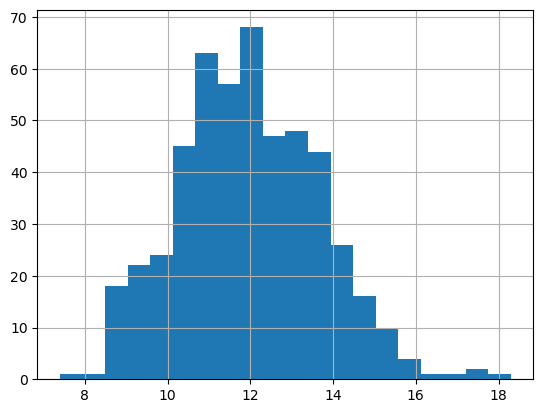

In [285]:
df['М300, Мпа'].hist(bins=20)
plt.savefig('hist1.png')

In [286]:
df['М300, Мпа'].describe()

count    499.000000
mean      11.963922
std        1.710119
min        7.400000
25%       10.765000
50%       11.900000
75%       13.100000
max       18.300000
Name: М300, Мпа, dtype: float64

In [287]:
print("skewness = " + str(df['М300, Мпа'].skew()))
print("kurtosis = " + str(df['М300, Мпа'].kurtosis()))

skewness = 0.2632667027647607
kurtosis = 0.13786115353103323


In [288]:
shapiro(df['М300, Мпа'])

ShapiroResult(statistic=0.9931439757347107, pvalue=0.022521551698446274)

In [289]:
normaltest(df['М300, Мпа'])

NormaltestResult(statistic=6.210068862535163, pvalue=0.04482297522084385)

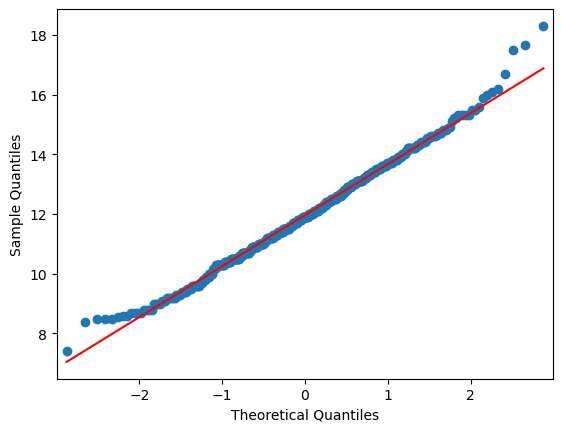

In [290]:
qqplot(df['М300, Мпа'], line='s')
plt.savefig('qq1.png')

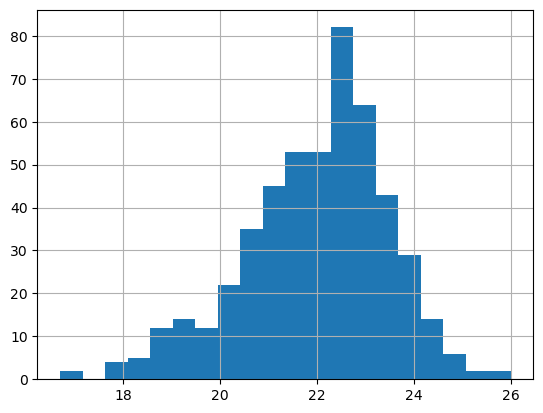

In [291]:
df['Fразрыв, МПа'].hist(bins=20)
plt.savefig('hist2.png')

In [292]:
df['Fразрыв, МПа'].describe()

count    499.000000
mean      21.978243
std        1.486312
min       16.700000
25%       21.100000
50%       22.200000
75%       23.000000
max       26.000000
Name: Fразрыв, МПа, dtype: float64

In [293]:
print("skewness = " + str(df['Fразрыв, МПа'].skew()))
print("kurtosis = " + str(df['Fразрыв, МПа'].kurtosis()))

skewness = -0.5388952474924195
kurtosis = 0.36770753412211077


In [294]:
shapiro(df['Fразрыв, МПа'])

ShapiroResult(statistic=0.9804007411003113, pvalue=2.9640268621733412e-06)

In [295]:
normaltest(df['Fразрыв, МПа'])

NormaltestResult(statistic=24.345657477223636, pvalue=5.169013300570296e-06)

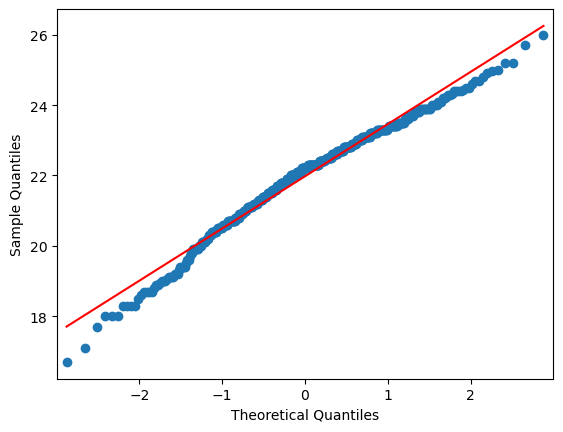

In [296]:
qqplot(df['Fразрыв, МПа'], line='s')
plt.savefig('qq2.png')

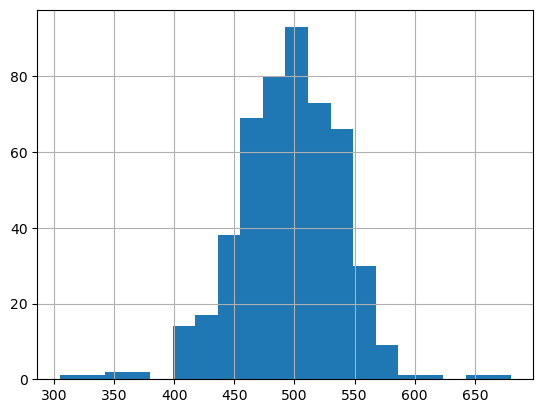

In [297]:
df['Е, %'].hist(bins=20)
plt.savefig('hist3.png')

In [298]:
df['Е, %'].describe()


count    499.000000
mean     495.521124
std       42.835152
min      305.000000
25%      470.000000
50%      500.000000
75%      525.000000
max      680.000000
Name: Е, %, dtype: float64

In [299]:
print("skewness = " + str(df['Е, %'].skew()))
print("kurtosis = " + str(df['Е, %'].kurtosis()))

skewness = -0.3097026148460063
kurtosis = 1.731331358988045


In [300]:
shapiro(df['Е, %'])

ShapiroResult(statistic=0.9808474183082581, pvalue=3.84711302103824e-06)

In [301]:
normaltest(df['Е, %'])

NormaltestResult(statistic=29.944991453420293, pvalue=3.144327149217323e-07)

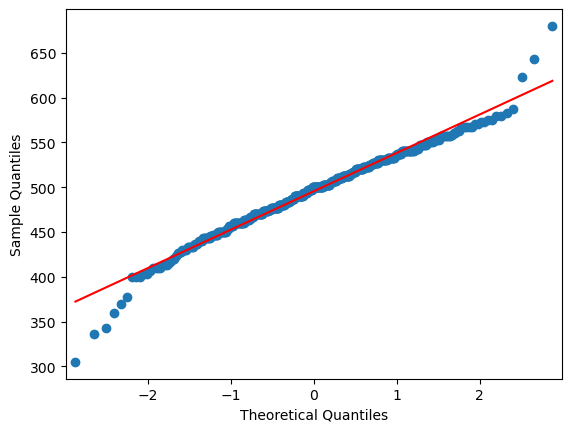

In [302]:
qqplot(df['Е, %'], line='s')
plt.savefig('qq3.png')

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  499 non-null    int64  
 1   М.ч. оксида цинка           499 non-null    float64
 2   М.ч. стеариновой кислоты    499 non-null    float64
 3   М.ч. бентонита              499 non-null    float64
 4   М.ч. жирных кислот          499 non-null    float64
 5   Загрузка смесителя, кг      234 non-null    float64
 6   Скорость смесителя, об/мин  187 non-null    float64
 7   Температура смешения, оС    499 non-null    int64  
 8   М300, Мпа                   499 non-null    float64
 9   Fразрыв, МПа                499 non-null    float64
 10  Е, %                        499 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 43.0 KB


In [304]:
df = df[df['Скорость смесителя, об/мин'].notna()]
df = df[df['Скорость смесителя, об/мин'] > 0]

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 469
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  165 non-null    int64  
 1   М.ч. оксида цинка           165 non-null    float64
 2   М.ч. стеариновой кислоты    165 non-null    float64
 3   М.ч. бентонита              165 non-null    float64
 4   М.ч. жирных кислот          165 non-null    float64
 5   Загрузка смесителя, кг      165 non-null    float64
 6   Скорость смесителя, об/мин  165 non-null    float64
 7   Температура смешения, оС    165 non-null    int64  
 8   М300, Мпа                   165 non-null    float64
 9   Fразрыв, МПа                165 non-null    float64
 10  Е, %                        165 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 15.5 KB


<AxesSubplot: >

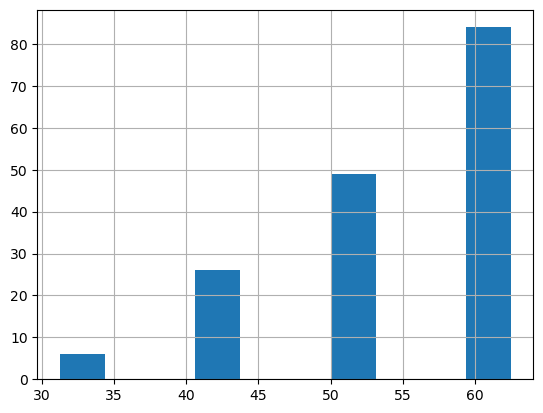

In [306]:
df['Скорость смесителя, об/мин'].hist()

In [307]:
speed = df['Скорость смесителя, об/мин'].unique()
speed.sort()
speed

array([31.25, 41.7 , 50.  , 62.5 ])

<AxesSubplot: >

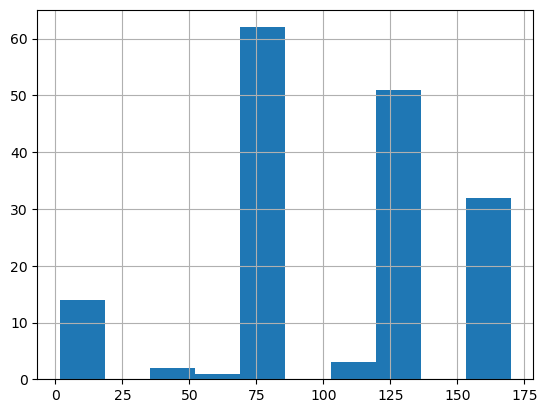

In [308]:
df['Загрузка смесителя, кг'].hist()

In [309]:
weight = df['Загрузка смесителя, кг'].unique()
weight.sort()
weight

array([  1.7,   3. ,  51. ,  69. ,  85. , 110. , 136. , 169. , 170. ])

<AxesSubplot: >

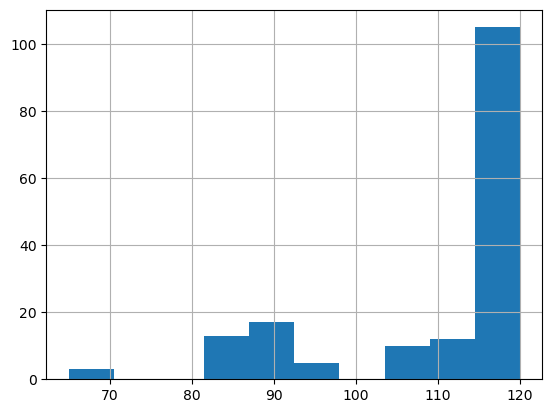

In [310]:
df['Температура смешения, оС'].hist()

In [311]:
df.loc[df['Температура смешения, оС'] == 65, 'Температура смешения, оС'] = 85
temp = df['Температура смешения, оС'].unique()
temp.sort()
temp

array([ 85,  90,  95, 105, 110, 120], dtype=int64)

In [312]:
"""От температуры"""

'От температуры'

In [313]:
'''Зафиксируем скорость смесителя 41,7 и загрузку смесителя 169'''
new_df = df[df['Скорость смесителя, об/мин'] == 41.7]
new_df = new_df[new_df['Загрузка смесителя, кг'] == 169]
new_df

,Unnamed: 0,М.ч. оксида цинка,М.ч. стеариновой кислоты,М.ч. бентонита,М.ч. жирных кислот,"Загрузка смесителя, кг","Скорость смесителя, об/мин","Температура смешения, оС","М300, Мпа","Fразрыв, МПа","Е, %"
260,912,1.18,1.18,1.64,0.0,169.0,41.7,110,15.3,22.0,400.0
261,914,1.18,1.18,1.64,0.0,169.0,41.7,110,13.5,23.8,497.0
294,1083,1.18,1.18,1.64,0.0,169.0,41.7,120,9.4,23.2,507.0
295,1084,1.18,1.18,1.64,0.0,169.0,41.7,120,11.3,20.5,502.0


In [314]:
"""От скорости смешения"""

'От скорости смешения'

In [315]:
'''Зафиксируем температуру смешения 85 и загрузку смесителя равную 136 кг'''
new_df = df[df['Температура смешения, оС'] == 85]
new_df = new_df[new_df['Загрузка смесителя, кг'] == 136]
new_df = new_df[new_df['М.ч. оксида цинка'] == 1.16]
new_df

,Unnamed: 0,М.ч. оксида цинка,М.ч. стеариновой кислоты,М.ч. бентонита,М.ч. жирных кислот,"Загрузка смесителя, кг","Скорость смесителя, об/мин","Температура смешения, оС","М300, Мпа","Fразрыв, МПа","Е, %"
0,3,1.16,0.96,1.64,0.24,136.0,50.0,85,11.6,22.9,557.0
120,362,1.16,1.00,1.60,0.20,136.0,41.7,85,13.5,22.1,513.0
165,474,1.16,0.96,1.64,0.24,136.0,50.0,85,10.8,21.2,513.0
169,541,1.16,0.96,1.64,0.24,136.0,41.7,85,11.6,22.2,530.0
170,543,1.16,0.96,1.64,0.24,136.0,41.7,85,10.5,22.5,547.0
229,719,1.16,1.00,1.64,0.20,136.0,50.0,85,13.9,24.2,520.0
230,720,1.16,1.00,1.64,0.20,136.0,50.0,85,11.8,19.8,463.0
233,725,1.16,1.00,1.64,0.20,136.0,50.0,85,9.1,19.0,503.0


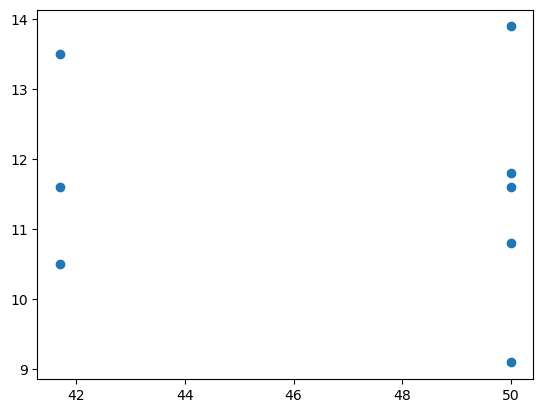

In [316]:
plt.scatter(new_df['Скорость смесителя, об/мин'], new_df['М300, Мпа'])

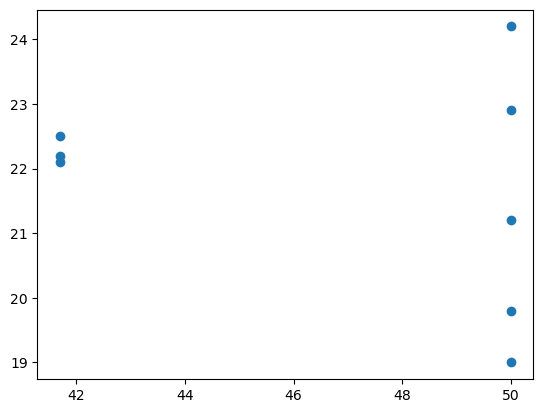

In [317]:
plt.scatter(new_df['Скорость смесителя, об/мин'], new_df['Fразрыв, МПа'])

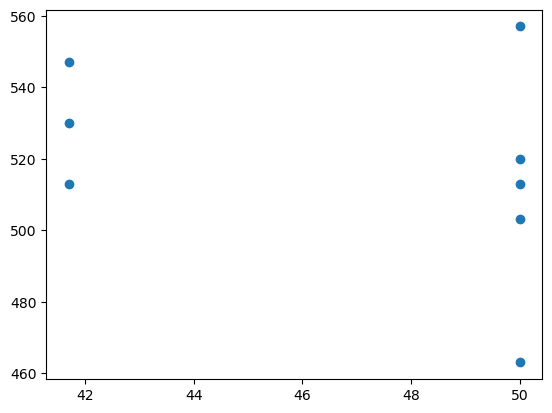

In [318]:
plt.scatter(new_df['Скорость смесителя, об/мин'], new_df['Е, %'])

In [319]:
'''Зафиксируем температуру смешения 85 и загрузку смесителя равную 136 кг'''
new_df = df[df['Температура смешения, оС'] == 85]
new_df = new_df[new_df['Загрузка смесителя, кг'] == 169]
new_df

,Unnamed: 0,М.ч. оксида цинка,М.ч. стеариновой кислоты,М.ч. бентонита,М.ч. жирных кислот,"Загрузка смесителя, кг","Скорость смесителя, об/мин","Температура смешения, оС","М300, Мпа","Fразрыв, МПа","Е, %"
311,1167,1.16,0.96,1.64,0.24,169.0,50.00,85,14.7,23.1,477.0
316,1229,1.16,0.96,1.64,0.24,169.0,31.25,85,14.4,21.8,443.0
346,1421,1.16,0.96,1.64,0.24,169.0,50.00,85,14.0,26.0,473.0


In [320]:
'''Зафиксируем температуру смешения 90 и загрузку смесителя равную 136 кг'''
new_df = df[df['Температура смешения, оС'] == 90]
new_df = new_df[new_df['Загрузка смесителя, кг'] == 170]
new_df

,Unnamed: 0,М.ч. оксида цинка,М.ч. стеариновой кислоты,М.ч. бентонита,М.ч. жирных кислот,"Загрузка смесителя, кг","Скорость смесителя, об/мин","Температура смешения, оС","М300, Мпа","Fразрыв, МПа","Е, %"
368,1547,1.2,0.8,1.6,0.4,170.0,50.00,90,11.3,22.9,500.0
369,1552,1.2,0.8,1.6,0.4,170.0,50.00,90,12.0,22.9,503.0
370,1568,1.2,1.0,1.6,0.2,170.0,50.00,90,10.7,23.1,505.0
371,1569,1.2,1.0,1.6,0.2,170.0,50.00,90,11.2,23.7,493.0
372,1571,1.2,1.0,1.6,0.2,170.0,50.00,90,12.3,21.5,410.0
373,1574,1.2,0.8,1.6,0.4,170.0,31.25,90,11.4,23.9,527.0
398,1678,1.2,1.0,1.6,0.2,170.0,50.00,90,10.5,20.6,556.0
399,1679,1.2,1.0,1.6,0.2,170.0,50.00,90,11.0,22.1,513.0
400,1680,1.2,1.0,1.6,0.2,170.0,50.00,90,10.4,22.0,500.0
401,1688,1.2,1.0,1.6,0.2,170.0,31.25,90,10.3,22.2,505.0


In [321]:
'''Зафиксируем температуру смешения 95 и загрузку смесителя равную 136 кг'''
new_df = df[df['Температура смешения, оС'] == 95]
new_df

,Unnamed: 0,М.ч. оксида цинка,М.ч. стеариновой кислоты,М.ч. бентонита,М.ч. жирных кислот,"Загрузка смесителя, кг","Скорость смесителя, об/мин","Температура смешения, оС","М300, Мпа","Fразрыв, МПа","Е, %"
465,1953,1.32,0.8,1.68,0.2,169.0,50.0,95,14.650000,24.230000,445.00
466,2054,1.32,0.8,1.68,0.2,85.0,62.5,95,14.530000,23.770000,420.00
467,2056,1.32,0.8,1.68,0.2,85.0,62.5,95,12.087126,21.783685,490.00
468,2066,1.32,0.8,1.68,0.2,85.0,62.5,95,16.680000,21.490000,370.00
469,2078,1.32,0.8,1.68,0.2,85.0,62.5,95,13.770000,21.200000,433.33


In [322]:
'''Зафиксируем температуру смешения 105'''
new_df = df[df['Температура смешения, оС'] == 105]
new_df

,Unnamed: 0,М.ч. оксида цинка,М.ч. стеариновой кислоты,М.ч. бентонита,М.ч. жирных кислот,"Загрузка смесителя, кг","Скорость смесителя, об/мин","Температура смешения, оС","М300, Мпа","Fразрыв, МПа","Е, %"
414,1860,1.2,1.2,1.6,0.0,3.0,62.5,105,11.63,22.52,525.00
415,1863,1.2,1.2,1.6,0.0,3.0,62.5,105,10.95,20.98,475.00
416,1866,1.4,1.2,1.4,0.0,3.0,62.5,105,12.29,19.07,410.00
417,1869,1.4,1.2,1.4,0.0,3.0,62.5,105,13.39,21.16,415.00
418,1872,1.4,1.2,1.4,0.0,3.0,62.5,105,12.44,23.48,500.00
419,1875,1.4,1.2,1.4,0.0,3.0,62.5,105,10.48,22.71,510.00
420,1878,1.6,1.2,1.2,0.0,3.0,62.5,105,11.95,21.14,460.00
421,1881,1.6,1.2,1.2,0.0,3.0,62.5,105,12.65,21.15,433.33
422,1884,1.6,1.2,1.2,0.0,3.0,62.5,105,13.25,22.48,460.00
423,1887,1.6,1.2,1.2,0.0,3.0,62.5,105,12.36,22.43,476.67


In [323]:
temp

array([ 85,  90,  95, 105, 110, 120], dtype=int64)

In [324]:
'''Зафиксируем температуру смешения 110 и загрузка смесителя 169'''
new_df = df[df['Температура смешения, оС'] == 110]
new_df = new_df[new_df['Загрузка смесителя, кг'] == 169]
new_df

,Unnamed: 0,М.ч. оксида цинка,М.ч. стеариновой кислоты,М.ч. бентонита,М.ч. жирных кислот,"Загрузка смесителя, кг","Скорость смесителя, об/мин","Температура смешения, оС","М300, Мпа","Fразрыв, МПа","Е, %"
258,841,1.18,1.18,1.64,0.0,169.0,50.0,110,14.4,21.3,413.0
259,842,1.18,1.18,1.64,0.0,169.0,50.0,110,9.0,17.1,530.0
260,912,1.18,1.18,1.64,0.0,169.0,41.7,110,15.3,22.0,400.0
261,914,1.18,1.18,1.64,0.0,169.0,41.7,110,13.5,23.8,497.0


In [325]:
'''Зафиксируем температуру смешения 120 и загрузка смесителя 136'''

new_df = df[df['Температура смешения, оС'] == 120]
new_df = new_df[new_df['Загрузка смесителя, кг'] == 136]
new_df = new_df[new_df['М.ч. оксида цинка'] == 1.18]
new_df = new_df[new_df['М300, Мпа'] < 14]
new_df

,Unnamed: 0,М.ч. оксида цинка,М.ч. стеариновой кислоты,М.ч. бентонита,М.ч. жирных кислот,"Загрузка смесителя, кг","Скорость смесителя, об/мин","Температура смешения, оС","М300, Мпа","Fразрыв, МПа","Е, %"
3,27,1.18,1.18,1.65,0.0,136.0,41.7,120,12.4,21.5,500.0
38,95,1.18,1.18,1.65,0.0,136.0,50.0,120,11.3,20.5,530.0
39,96,1.18,1.18,1.65,0.0,136.0,50.0,120,8.7,20.8,543.0
40,99,1.18,1.18,1.65,0.0,136.0,50.0,120,11.8,21.4,483.0
41,109,1.18,1.18,1.65,0.0,136.0,50.0,120,11.3,20.6,497.0
42,114,1.18,1.18,1.65,0.0,136.0,50.0,120,9.4,20.6,575.0
43,126,1.18,1.18,1.65,0.0,136.0,50.0,120,9.8,19.4,517.0
44,130,1.18,1.18,1.65,0.0,136.0,41.7,120,8.7,20.1,567.0
45,131,1.18,1.18,1.65,0.0,136.0,41.7,120,9.5,20.4,527.0
46,133,1.18,1.18,1.65,0.0,136.0,41.7,120,10.0,17.7,443.0


0.2610989860448958

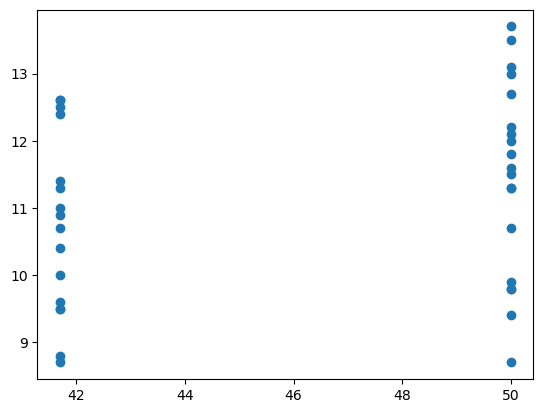

In [326]:
plt.scatter(new_df['Скорость смесителя, об/мин'], new_df['М300, Мпа'])
plt.savefig('M3001.png')
new_df['М300, Мпа'].corr(new_df['Скорость смесителя, об/мин'])

0.10471241688632049

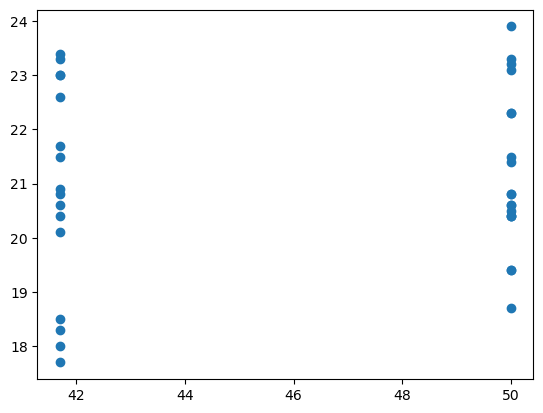

In [327]:
plt.scatter(new_df['Скорость смесителя, об/мин'], new_df['Fразрыв, МПа'])

plt.savefig('Fразрыв1.png')
new_df['Скорость смесителя, об/мин'].corr(new_df['Fразрыв, МПа'])

-0.18116610118812926

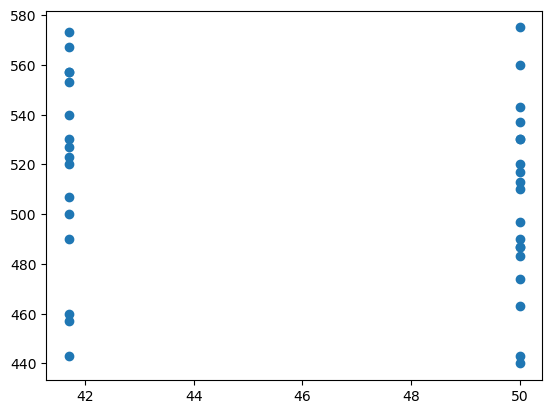

In [328]:
plt.scatter(new_df['Скорость смесителя, об/мин'], new_df['Е, %'])

plt.savefig('Е1.png')
new_df['Скорость смесителя, об/мин'].corr(new_df['Е, %'])

In [329]:
'''Зафиксируем температуру смешения 120 и загрузка смесителя 136'''
new_df = df[df['Температура смешения, оС'] == 120]
new_df = new_df[new_df['Загрузка смесителя, кг'] == 169]
new_df

,Unnamed: 0,М.ч. оксида цинка,М.ч. стеариновой кислоты,М.ч. бентонита,М.ч. жирных кислот,"Загрузка смесителя, кг","Скорость смесителя, об/мин","Температура смешения, оС","М300, Мпа","Fразрыв, МПа","Е, %"
290,1012,1.18,1.18,1.64,0.0,169.0,50.00,120,12.8,21.8,476.0
291,1013,1.18,1.18,1.64,0.0,169.0,50.00,120,14.2,21.1,453.0
292,1017,1.18,1.18,1.64,0.0,169.0,50.00,120,11.2,22.2,502.0
293,1018,1.18,1.18,1.64,0.0,169.0,50.00,120,11.7,20.1,502.0
294,1083,1.18,1.18,1.64,0.0,169.0,41.70,120,9.4,23.2,507.0
295,1084,1.18,1.18,1.64,0.0,169.0,41.70,120,11.3,20.5,502.0
296,1101,1.18,1.18,1.64,0.0,169.0,62.50,120,11.5,22.0,477.0
297,1102,1.18,1.18,1.64,0.0,169.0,62.50,120,11.2,23.5,511.0
312,1201,1.18,1.18,1.64,0.0,169.0,50.00,120,10.2,20.7,481.0
313,1203,1.18,1.18,1.64,0.0,169.0,50.00,120,13.2,22.1,460.0


0.04000491201451066

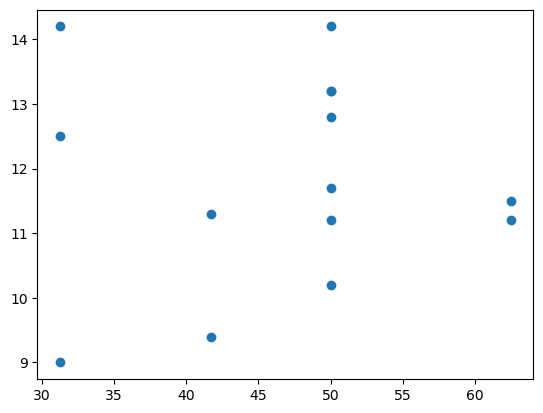

In [330]:
plt.scatter(new_df['Скорость смесителя, об/мин'], new_df['М300, Мпа'])
new_df['Скорость смесителя, об/мин'].corr(new_df['М300, Мпа'])

0.18836286487609588

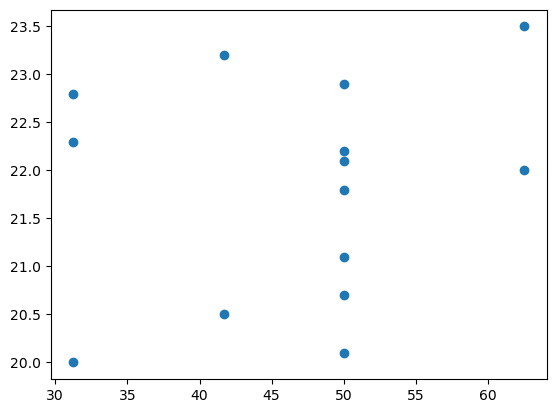

In [331]:
plt.scatter(new_df['Скорость смесителя, об/мин'], new_df['Fразрыв, МПа'])
new_df['Скорость смесителя, об/мин'].corr(new_df['Fразрыв, МПа'])

0.14082363642403625

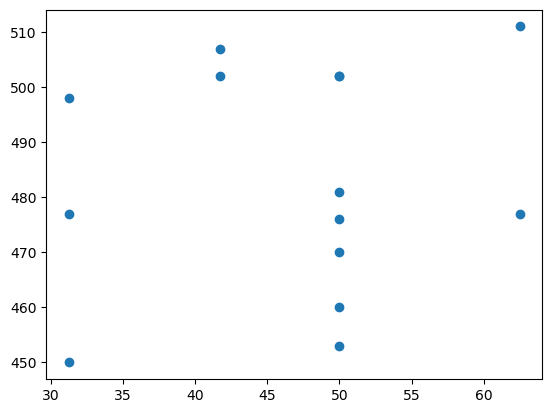

In [332]:
plt.scatter(new_df['Скорость смесителя, об/мин'], new_df['Е, %'])
new_df['Скорость смесителя, об/мин'].corr(new_df['Е, %'])

In [333]:
"""От загрузки"""

'От загрузки'

In [334]:
'''Температура смешения 85 и скорость вращения 50'''
new_df = df[df['Температура смешения, оС'] == 85]
new_df = new_df[new_df['Скорость смесителя, об/мин'] == 50]
new_df = new_df[new_df['М.ч. стеариновой кислоты'] == 0.96]
new_df

,Unnamed: 0,М.ч. оксида цинка,М.ч. стеариновой кислоты,М.ч. бентонита,М.ч. жирных кислот,"Загрузка смесителя, кг","Скорость смесителя, об/мин","Температура смешения, оС","М300, Мпа","Fразрыв, МПа","Е, %"
0,3,1.16,0.96,1.64,0.24,136.0,50.0,85,11.6,22.9,557.0
165,474,1.16,0.96,1.64,0.24,136.0,50.0,85,10.8,21.2,513.0
311,1167,1.16,0.96,1.64,0.24,169.0,50.0,85,14.7,23.1,477.0
346,1421,1.16,0.96,1.64,0.24,169.0,50.0,85,14.0,26.0,473.0


In [335]:
'''Температура смешения 85 и скорость вращения 50'''
new_df = df[df['Температура смешения, оС'] == 85]
new_df = new_df[new_df['Скорость смесителя, об/мин'] == 41.7]
new_df

,Unnamed: 0,М.ч. оксида цинка,М.ч. стеариновой кислоты,М.ч. бентонита,М.ч. жирных кислот,"Загрузка смесителя, кг","Скорость смесителя, об/мин","Температура смешения, оС","М300, Мпа","Fразрыв, МПа","Е, %"
4,28,1.18,1.18,1.65,0.00,136.0,41.7,85,11.8,22.0,483.0
5,29,1.08,1.12,1.80,0.00,136.0,41.7,85,12.5,23.9,493.0
120,362,1.16,1.00,1.60,0.20,136.0,41.7,85,13.5,22.1,513.0
169,541,1.16,0.96,1.64,0.24,136.0,41.7,85,11.6,22.2,530.0
170,543,1.16,0.96,1.64,0.24,136.0,41.7,85,10.5,22.5,547.0


In [336]:
'''Температура смешения 90 и скорость вращения 62.5'''
new_df = df[df['Температура смешения, оС'] == 90]
new_df = new_df[new_df['Скорость смесителя, об/мин'] == 62.5]
new_df

,Unnamed: 0,М.ч. оксида цинка,М.ч. стеариновой кислоты,М.ч. бентонита,М.ч. жирных кислот,"Загрузка смесителя, кг","Скорость смесителя, об/мин","Температура смешения, оС","М300, Мпа","Fразрыв, МПа","Е, %"
374,1592,1.2,0.8,1.6,0.4,85.0,62.5,90,10.5,22.9,507.0
375,1598,1.2,0.8,1.6,0.4,85.0,62.5,90,12.1,22.1,510.0
376,1616,1.2,1.0,1.6,0.2,85.0,62.5,90,10.5,23.4,525.0
402,1695,1.2,1.0,1.6,0.2,85.0,62.5,90,10.7,19.4,475.0
403,1696,1.2,1.0,1.6,0.2,85.0,62.5,90,11.3,21.4,536.0
404,1697,1.2,1.0,1.6,0.2,85.0,62.5,90,10.9,21.8,516.0
405,1698,1.2,1.0,1.6,0.2,85.0,62.5,90,10.9,23.6,523.0


In [337]:
'''Температура смешения 95 и скорость вращения 62.5'''
new_df = df[df['Температура смешения, оС'] == 95]

new_df

,Unnamed: 0,М.ч. оксида цинка,М.ч. стеариновой кислоты,М.ч. бентонита,М.ч. жирных кислот,"Загрузка смесителя, кг","Скорость смесителя, об/мин","Температура смешения, оС","М300, Мпа","Fразрыв, МПа","Е, %"
465,1953,1.32,0.8,1.68,0.2,169.0,50.0,95,14.650000,24.230000,445.00
466,2054,1.32,0.8,1.68,0.2,85.0,62.5,95,14.530000,23.770000,420.00
467,2056,1.32,0.8,1.68,0.2,85.0,62.5,95,12.087126,21.783685,490.00
468,2066,1.32,0.8,1.68,0.2,85.0,62.5,95,16.680000,21.490000,370.00
469,2078,1.32,0.8,1.68,0.2,85.0,62.5,95,13.770000,21.200000,433.33


In [338]:
'''Температура смешения 105'''
new_df = df[df['Температура смешения, оС'] == 105]

new_df

,Unnamed: 0,М.ч. оксида цинка,М.ч. стеариновой кислоты,М.ч. бентонита,М.ч. жирных кислот,"Загрузка смесителя, кг","Скорость смесителя, об/мин","Температура смешения, оС","М300, Мпа","Fразрыв, МПа","Е, %"
414,1860,1.2,1.2,1.6,0.0,3.0,62.5,105,11.63,22.52,525.00
415,1863,1.2,1.2,1.6,0.0,3.0,62.5,105,10.95,20.98,475.00
416,1866,1.4,1.2,1.4,0.0,3.0,62.5,105,12.29,19.07,410.00
417,1869,1.4,1.2,1.4,0.0,3.0,62.5,105,13.39,21.16,415.00
418,1872,1.4,1.2,1.4,0.0,3.0,62.5,105,12.44,23.48,500.00
419,1875,1.4,1.2,1.4,0.0,3.0,62.5,105,10.48,22.71,510.00
420,1878,1.6,1.2,1.2,0.0,3.0,62.5,105,11.95,21.14,460.00
421,1881,1.6,1.2,1.2,0.0,3.0,62.5,105,12.65,21.15,433.33
422,1884,1.6,1.2,1.2,0.0,3.0,62.5,105,13.25,22.48,460.00
423,1887,1.6,1.2,1.2,0.0,3.0,62.5,105,12.36,22.43,476.67


In [339]:
'''Температура смешения 110 и скорость смешения 62,5'''
new_df = df[df['Температура смешения, оС'] == 110]
new_df = new_df[new_df['Скорость смесителя, об/мин'] == 62.5]
new_df = new_df[new_df['М.ч. оксида цинка'] == 1.20]
new_df

,Unnamed: 0,М.ч. оксида цинка,М.ч. стеариновой кислоты,М.ч. бентонита,М.ч. жирных кислот,"Загрузка смесителя, кг","Скорость смесителя, об/мин","Температура смешения, оС","М300, Мпа","Fразрыв, МПа","Е, %"
410,1848,1.2,1.2,1.6,0.0,1.7,62.5,110,11.37,21.70,490.0
411,1851,1.2,1.2,1.6,0.0,1.7,62.5,110,12.04,20.71,470.0
412,1854,1.2,1.2,1.6,0.0,1.7,62.5,110,11.16,21.38,470.0
413,1857,1.2,1.2,1.6,0.0,3.0,62.5,110,11.90,20.49,445.0


In [340]:
'''Температура смешения 110 и скорость смешения 62,5'''
new_df = df[df['Температура смешения, оС'] == 110]
new_df = new_df[new_df['Скорость смесителя, об/мин'] == 62.5]
new_df

,Unnamed: 0,М.ч. оксида цинка,М.ч. стеариновой кислоты,М.ч. бентонита,М.ч. жирных кислот,"Загрузка смесителя, кг","Скорость смесителя, об/мин","Температура смешения, оС","М300, Мпа","Fразрыв, МПа","Е, %"
262,921,1.17,1.03,1.41,0.0,51.0,62.5,110,13.60,24.40,495.0
263,922,1.17,1.03,1.41,0.0,51.0,62.5,110,13.20,24.10,485.0
264,927,1.17,1.17,1.66,0.0,85.0,62.5,110,9.10,18.60,547.0
410,1848,1.20,1.20,1.60,0.0,1.7,62.5,110,11.37,21.70,490.0
411,1851,1.20,1.20,1.60,0.0,1.7,62.5,110,12.04,20.71,470.0
412,1854,1.20,1.20,1.60,0.0,1.7,62.5,110,11.16,21.38,470.0
413,1857,1.20,1.20,1.60,0.0,3.0,62.5,110,11.90,20.49,445.0


-0.20100021311722965

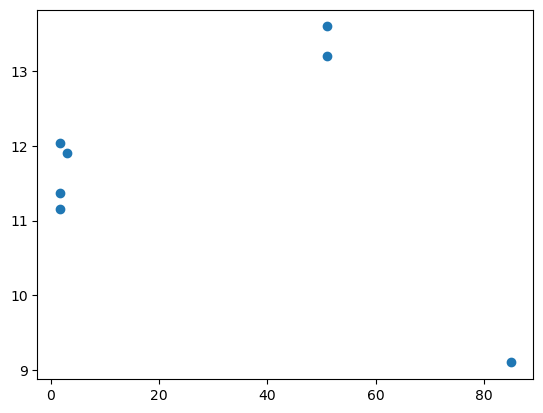

In [341]:
plt.scatter(new_df['Загрузка смесителя, кг'], new_df['М300, Мпа'])
new_df['Загрузка смесителя, кг'].corr(new_df['М300, Мпа'])

0.012468744869537323

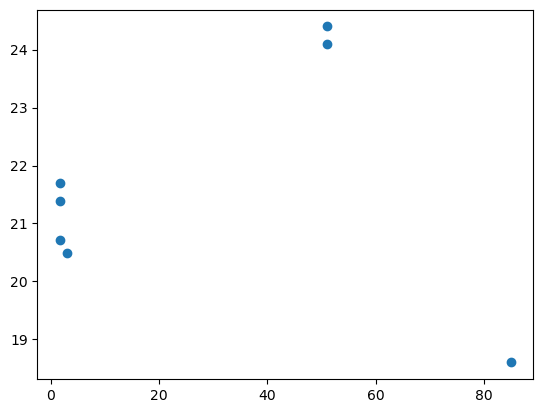

In [342]:
plt.scatter(new_df['Загрузка смесителя, кг'], new_df['Fразрыв, МПа'])
new_df['Загрузка смесителя, кг'].corr(new_df['Fразрыв, МПа'])

0.8354441522278644

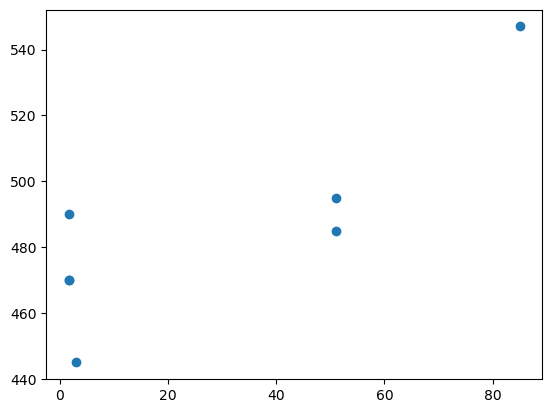

In [343]:
plt.scatter(new_df['Загрузка смесителя, кг'], new_df['Е, %'])
new_df['Загрузка смесителя, кг'].corr(new_df['Е, %'])

In [344]:
'''Температура смешения 120 и скорость смешения 50'''
new_df = df[df['Температура смешения, оС'] == 120]
new_df = new_df[new_df['Скорость смесителя, об/мин'] == 50]
new_df = new_df[new_df['М.ч. оксида цинка'] == 1.18]
new_df

,Unnamed: 0,М.ч. оксида цинка,М.ч. стеариновой кислоты,М.ч. бентонита,М.ч. жирных кислот,"Загрузка смесителя, кг","Скорость смесителя, об/мин","Температура смешения, оС","М300, Мпа","Fразрыв, МПа","Е, %"
38,95,1.18,1.18,1.65,0.0,136.0,50.0,120,11.3,20.5,530.0
39,96,1.18,1.18,1.65,0.0,136.0,50.0,120,8.7,20.8,543.0
40,99,1.18,1.18,1.65,0.0,136.0,50.0,120,11.8,21.4,483.0
41,109,1.18,1.18,1.65,0.0,136.0,50.0,120,11.3,20.6,497.0
42,114,1.18,1.18,1.65,0.0,136.0,50.0,120,9.4,20.6,575.0
43,126,1.18,1.18,1.65,0.0,136.0,50.0,120,9.8,19.4,517.0
79,213,1.18,1.18,1.65,0.0,136.0,50.0,120,12.7,20.8,443.0
80,214,1.18,1.18,1.65,0.0,136.0,50.0,120,9.8,18.7,487.0
81,234,1.18,1.18,1.65,0.0,136.0,50.0,120,12.1,21.5,487.0
82,235,1.18,1.18,1.65,0.0,136.0,50.0,120,13.5,20.4,440.0


0.14356839315095068

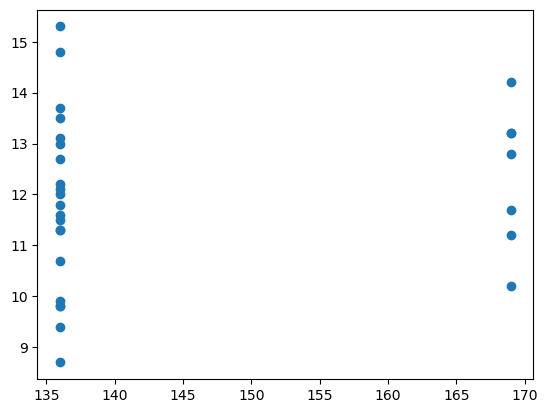

In [345]:
plt.scatter(new_df['Загрузка смесителя, кг'], new_df['М300, Мпа'])

new_df['Загрузка смесителя, кг'].corr(new_df['М300, Мпа'])

0.03863866005389135

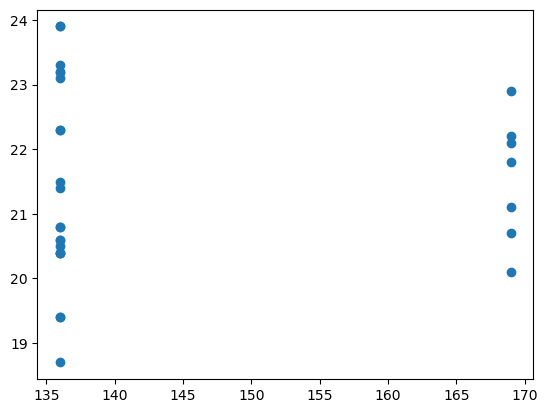

In [346]:
plt.scatter(new_df['Загрузка смесителя, кг'], new_df['Fразрыв, МПа'])

new_df['Загрузка смесителя, кг'].corr(new_df['Fразрыв, МПа'])

-0.2774534432682601

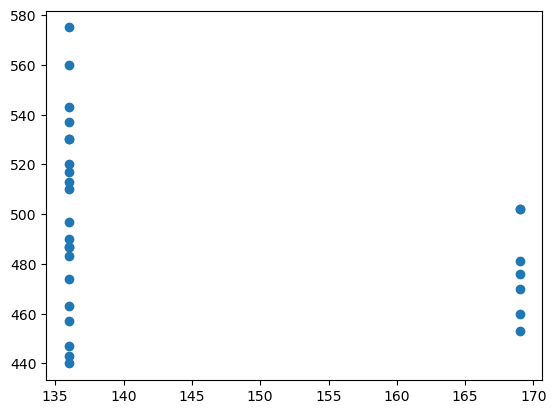

In [347]:
plt.scatter(new_df['Загрузка смесителя, кг'], new_df['Е, %'])
new_df['Загрузка смесителя, кг'].corr(new_df['Е, %'])

In [348]:
'''Температура смешения 120 и скорость смешения 41.7'''
new_df = df[df['Температура смешения, оС'] == 120]
new_df = new_df[new_df['Скорость смесителя, об/мин'] == 41.7]
new_df

,Unnamed: 0,М.ч. оксида цинка,М.ч. стеариновой кислоты,М.ч. бентонита,М.ч. жирных кислот,"Загрузка смесителя, кг","Скорость смесителя, об/мин","Температура смешения, оС","М300, Мпа","Fразрыв, МПа","Е, %"
3,27,1.18,1.18,1.65,0.00,136.0,41.7,120,12.4,21.5,500.0
6,51,1.16,0.96,1.64,0.24,136.0,41.7,120,12.9,23.1,500.0
44,130,1.18,1.18,1.65,0.00,136.0,41.7,120,8.7,20.1,567.0
45,131,1.18,1.18,1.65,0.00,136.0,41.7,120,9.5,20.4,527.0
46,133,1.18,1.18,1.65,0.00,136.0,41.7,120,10.0,17.7,443.0
47,134,1.18,1.18,1.65,0.00,136.0,41.7,120,10.4,20.9,557.0
48,141,1.18,1.18,1.65,0.00,136.0,41.7,120,8.8,18.0,520.0
49,148,1.18,1.18,1.65,0.00,136.0,41.7,120,9.5,20.6,523.0
83,238,1.18,1.18,1.65,0.00,136.0,41.7,120,11.4,18.5,460.0
84,239,1.18,1.18,1.65,0.00,136.0,41.7,120,12.6,23.0,490.0
